In [214]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import neighbors
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [215]:
# blobs creation
data, labels = make_blobs(n_samples = 250, n_features = 2, centers = 3, cluster_std = 0.5, center_box=(-1,1))

In [216]:
# data splitting
training_data, test_data, training_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=0)

Text(0.5, 1.0, 'Splitted data')

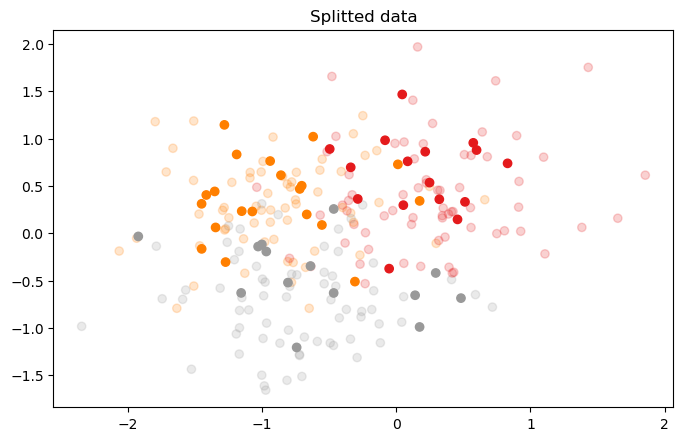

In [217]:
# splitted data plot
fig, ax= plt.subplots(figsize=(8,5), dpi=100)
ax.scatter(training_data.T[0],training_data.T[1],c=training_labels, cmap=cm.get_cmap("Set1"),alpha=0.2)
ax.scatter(test_data.T[0],test_data.T[1],c=test_labels, cmap=cm.get_cmap("Set1"))
ax.set_title("Splitted data")

In [218]:
### my KNN functions

# distance from a point p to a set of points ps
def distance(p,ps):
    return np.sum((ps-p)**2,axis=1)

# returns knn prediction on a single point
def knn_one_point(k,data,labels,newPoint):
    # compute distaces to the newPoint
    distances = distance(newPoint,data)
    # get the labels of the k nearest points
    knn_labels = sorted(labels[distances <= sorted(distances)[k-1]])[-k:]
    # counts how many times each label appears
    count = np.array([[label, np.count_nonzero(knn_labels == label)] for label in np.unique(knn_labels)])
    # if there is a tie, we delete the k-th nearest point
    if(np.count_nonzero(count.T[1] == count.T[1].max()) > 1):
        newLabel = knn_one_point(k-1,data,labels,newPoint)
    # elsewhere we assign the label that appears the most
    else:
        newLabel = int(count.T[0][count.T[1] == count.T[1].max()])
    return newLabel

# returns knn predictions for a set of points
def knn_multiple_points(k,data,labels,new_points):
    return np.array([knn_one_point(k,data,labels,new_points[i]) for i in range(len(new_points))])

# set k
k = 5

# run my knn
new_labels = knn_multiple_points(k,training_data,training_labels,test_data)

# my knn report
print("My KNN: ")
print(f"Test Set Score : {np.sum(new_labels == test_labels)/len(test_labels) * 100} %")
print(f"\nModel Classification Report : \n{classification_report(test_labels, new_labels)}")

# run sklearn knn
clf = neighbors.KNeighborsClassifier(k, weights="uniform")
clf.fit(training_data, training_labels)
new_labels_sklearn = clf.predict(test_data)

# sklearn knn report
print()
print("sklearn KNN: ")
print(f"Test Set Score : {np.sum(new_labels_sklearn == test_labels)/len(test_labels) * 100} %")
print(f"\nModel Classification Report : \n{classification_report(test_labels, new_labels_sklearn)}")

print(f"\nCoincidence between KNN's: {np.sum(new_labels == new_labels_sklearn)/len(new_labels)*100}%")


[0, 1, 1, 2, 2]
My KNN: 
Test Set Score : 70.0 %

Model Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.65      0.75      0.70        20
           2       0.70      0.50      0.58        14

    accuracy                           0.70        50
   macro avg       0.71      0.69      0.69        50
weighted avg       0.70      0.70      0.69        50


sklearn KNN: 
Test Set Score : 70.0 %

Model Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.65      0.75      0.70        20
           2       0.70      0.50      0.58        14

    accuracy                           0.70        50
   macro avg       0.71      0.69      0.69        50
weighted avg       0.70      0.70      0.69        50


Coincidence between KNN's: 100.0%


Text(0.5, 1.0, 'My KNN predictions')

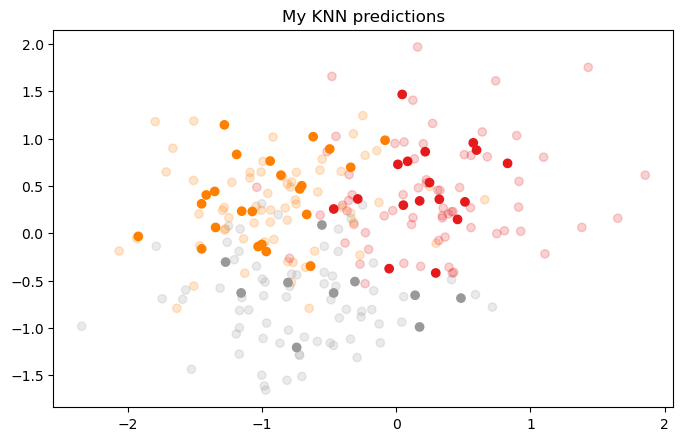

In [219]:
# My KNN predictions plot
fig, ax= plt.subplots(figsize=(8,5), dpi=100)
ax.scatter(training_data.T[0],training_data.T[1],c=training_labels, cmap=cm.get_cmap("Set1"),alpha=0.2)
ax.scatter(test_data.T[0],test_data.T[1],c=new_labels, cmap=cm.get_cmap("Set1"))
ax.set_title("My KNN predictions")

Text(0.5, 1.0, 'sklearn KNN predictions')

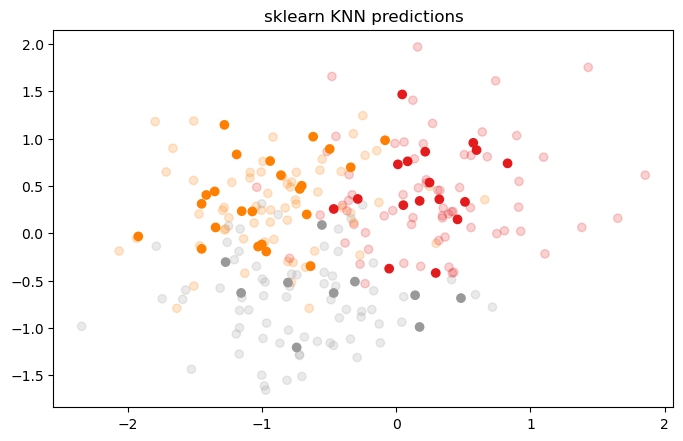

In [220]:
# sklearn KNN predictions plot
fig, ax= plt.subplots(figsize=(8,5), dpi=100)
ax.scatter(training_data.T[0],training_data.T[1],c=training_labels, cmap=cm.get_cmap("Set1"),alpha=0.2)
ax.scatter(test_data.T[0],test_data.T[1],c=new_labels_sklearn, cmap=cm.get_cmap("Set1"))
ax.set_title("sklearn KNN predictions")